In [98]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.utils.np_utils import to_categorical

import os

### Dataset Preparation

In [106]:
# Loading training dataset
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '../data/cross_circles/scaled/s32_1/',
    labels = 'inferred',
    label_mode = "binary",
    color_mode = 'grayscale',
    batch_size = 2,
    image_size = (32,32),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "training"
)

Found 252 files belonging to 2 classes.
Using 202 files for training.


In [107]:
# Loading validation dataset
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    '../data/cross_circles/scaled/s32_1/',
    labels = 'inferred',
    label_mode = "binary",
    color_mode = 'grayscale',
    batch_size = 2,
    image_size = (32,32),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "validation"
)

Found 252 files belonging to 2 classes.
Using 50 files for validation.


In [108]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

### Model Definition

In [111]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(32,32,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(1,activation='sigmoid'))

"""
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
"""

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32,32,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Fit the Model

In [114]:
# Fit the model
model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test,
)

Epoch 1/5
101/101 [==============================] - 1s 7ms/step - loss: 1.9548 - accuracy: 0.5215 - val_loss: 0.6247 - val_accuracy: 0.5800
Epoch 2/5
101/101 [==============================] - 1s 7ms/step - loss: 0.7281 - accuracy: 0.5133 - val_loss: 0.6150 - val_accuracy: 0.4200
Epoch 3/5
101/101 [==============================] - 1s 7ms/step - loss: 0.5269 - accuracy: 0.7491 - val_loss: 0.4456 - val_accuracy: 0.7600
Epoch 4/5
101/101 [==============================] - 1s 7ms/step - loss: 0.4585 - accuracy: 0.7779 - val_loss: 0.3156 - val_accuracy: 0.9600
Epoch 5/5
101/101 [==============================] - 1s 7ms/step - loss: 0.3215 - accuracy: 0.9489 - val_loss: 0.2452 - val_accuracy: 0.9600


### Alternate Model

In [102]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 1)))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.20))

model_1.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.20))

model_1.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.20))

model_1.add(Flatten())

model_1.add(Dense(256, activation = 'relu'))
model_1.add(Dropout(0.20))
model_1.add(Dense(2,activation='softmax'))

In [103]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [104]:
#compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [105]:
model_1.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
    callbacks=[cp_callback]
)

Epoch 1/10
101/101 [==============================] - 1s 7ms/step - loss: 0.7977 - accuracy: 0.5314 - val_loss: 0.6905 - val_accuracy: 0.5800

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
101/101 [==============================] - 1s 5ms/step - loss: 0.6971 - accuracy: 0.4338 - val_loss: 0.6899 - val_accuracy: 0.5800

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
101/101 [==============================] - 1s 5ms/step - loss: 0.6978 - accuracy: 0.4441 - val_loss: 0.6935 - val_accuracy: 0.4200

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
101/101 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5549 - val_loss: 0.6948 - val_accuracy: 0.4200

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
101/101 [==============================] - 1s 5ms/step - loss: 0.6920 - accuracy: 0.5831 - val_loss: 0.6952 - val_accuracy: 0.4200

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
101/101 [=========================

### Testing

In [115]:
import cv2

In [117]:
test_img = cv2.imread('../data/cross_circles/scaled/s32_1/circles/b_c_1.jpg')

In [118]:
imgRsize = cv2.resize(test_img,(32,32), interpolation = cv2.INTER_AREA)
imgGray = cv2.cvtColor(imgRsize,cv2.COLOR_BGR2GRAY)

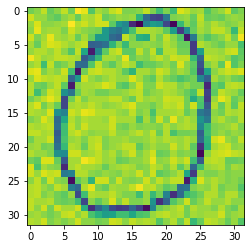

In [119]:
plt.imshow(imgGray)

In [120]:
test_lbl = model.predict(imgGray.reshape(1,32,32,1))
print(test_lbl)

[[9.829336e-27]]


In [121]:
test_2 = cv2.imread('circle_1.jpg')

In [122]:
rgb_planes = cv2.split(test_2)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

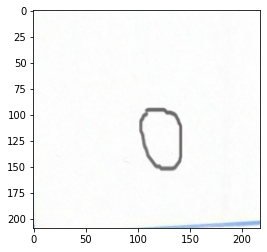

In [123]:
plt.imshow(result)

In [124]:
imgRsize = cv2.resize(result,(32,32), interpolation = cv2.INTER_AREA)
imgGray = cv2.cvtColor(imgRsize,cv2.COLOR_BGR2GRAY)

In [125]:
imgGray = imgGray/255.0

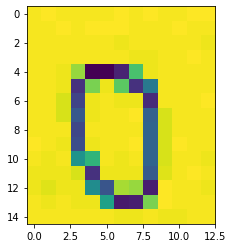

In [126]:
plt.imshow(imgGray[10:25,12:25])

In [127]:
new_img = imgGray[10:25,10:25]

In [128]:
imgRsize = cv2.resize(new_img,(32,32), interpolation = cv2.INTER_AREA)

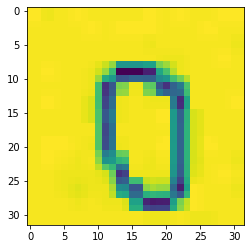

In [129]:
plt.imshow(imgRsize)

In [130]:
test_lbl = model.predict(imgRsize.reshape(1,32,32,1))
print(test_lbl)

[[0.80267066]]
